# Complexity Project

## 1 Implementation of the Oslo model.

### Task One

"Devise and perform some simple tests (e.g. by selecting particular simple values of p) to check whether your programme is working as intended. Document your tests in the project report"

In [106]:
import scipy as sp
import matplotlib.pyplot as plt
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The $oslo$ function which returns the final $z$ values and the final $h$ values which are worked out from the $z$ values and setting $h_{L+1} = 0$. The $oslo_plot$ function takes the output of the $oslo$ function and plots the heights.

In [99]:
def Oslo(L,p,n):
    
    #Initialisation
    z = sp.zeros(L)
    z_thresh = sp.zeros(L)
    n_grain = 0
    h_store = []

    def prob(p):
        if random.random() > p:
            return 1
            
        else:
            return 2
            
    def check_relax(z,z_thresh,L):
        relaxed = True
        for i in range(L):
            if z[i] > z_thresh[i]:
                relaxed = False
        return relaxed
    
    def h_generation(z):
        h = sp.zeros(L+1) #having the L+1 value as 0
        h[L] = 0
        for i in range(L-1,-1,-1):
            h[i] = z[i] + h[i+1]  
        return h
                
    for i in range(L):
        z_thresh[i] = prob(p)
    
    #Drive
    while n_grain < n:

        z[0] = z[0] + 1
        n_grain  = n_grain + 1
            
    #Relaxation
        while check_relax(z,z_thresh,L) == False:
        
            for i in range(L):

                if z[i] > z_thresh[i]: 

                    if i == 0:
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1

                    if i > 0 and i < (L -1):
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1 
                        z[i-1] = z[i-1] + 1
                        
                    if i == L - 1:
                        z[i] = z[i] - 1
                        z[i-1] = z[i-1] + 1
          
                    z_thresh[i] = prob(p)

        h_store.append(h_generation(z)[0])
                                
    h = h_generation(z)            
    return z , h , h_store , z_thresh

def Oslo_plot(oslo):
    L = len(oslo[1])
    L_plot = sp.linspace(0,
                         L-1,L) + 0.5
    h = oslo[1]
    plt.bar(L_plot,h, width = 1)
    plt.xlabel("Lattice Number")
    plt.ylabel("Height $h$")
    plt.title("Oslo Method")
    plt.savefig("osls_initial", dpi = 1000)
    plt.show()

Below is the result of the oslo_plot function

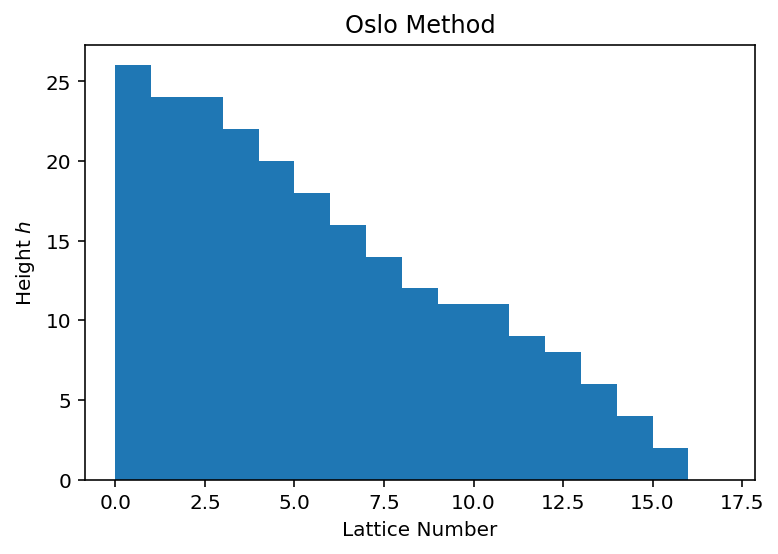

In [107]:
x = Oslo(16,0.5,1000)
Oslo_plot(x)

To test the function, the oslo_test function is used which returns the average height of the first entry after half the grains are added.


In [44]:
def Oslo_test(L,p,n):
    x = Oslo(L,p,n)
    Slice = int((7*n)/8)
    print("The mean of the steady state is ", "{:.1f}".format(sp.mean(x[2][Slice:n:1])), "for lattice size of", L)

Below are the results of the test. For size $L = 16$, the average height for the first site should be $26.5$, and for $L = 32$, the average height should be $53.9$.

In [46]:
Oslo_test(16,0.5,10000)
Oslo_test(32,0.5,10000)

The mean of the steady state is  26.5 for lattice size of 16
The mean of the steady state is  53.9 for lattice size of 32


## 2 The height of the pile $h(t; L)$


### Task 2a

"Starting from an empty system, measure the total height of the pile as a function of time t for the range of system sizes listed above. Plot the height h(t; L) vs. time t for the various system sizes in the same plot. Reflect upon the results obtained in terms of transient and recurrent configurations."

The height of the pile is given as the following:
<h1><center>$h(t ; L)=\sum_{i=1}^{L} z_{i}(t)$</center></h1>
The function $Oslo height$ returns a list of the heights for each time step. $Oslo height plot$ returns the plot, and $Oslo height list$ takes the first arguement as a list of the different $L$ sizes to be plotted and plots them on one graph. 

In [91]:
def Oslo_height(L,p,n):
    
    #Initialisation
    z = sp.zeros(L)
    z_thresh = sp.zeros(L)
    n_grain = 0
    height_store = []

    def prob(p):
        if random.random() > p:
            return 1
            
        else:
            return 2
            
    def check_relax(z,z_thresh,L):
        relaxed = True
        for i in range(L):
            if z[i] > z_thresh[i]:
                relaxed = False
        return relaxed
    
    def height(z_thresh):
        Sum = 0
        for i in range(L):
            Sum = Sum + z_thresh[i]
        return Sum
        
                
    for i in range(L):
        z_thresh[i] = prob(p)
    
    #Drive
    while n_grain < n:
        z[0] = z[0] + 1
        n_grain  = n_grain + 1
            
    #Relaxation
        while check_relax(z,z_thresh,L) == False:
        
            for i in range(L):

                if z[i] > z_thresh[i]: 

                    if i == 0:
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1

                    if i > 0 and i < (L -1):
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1 
                        z[i-1] = z[i-1] + 1
                        
                    if i == L - 1:
                        z[i] = z[i] - 1
                        z[i-1] = z[i-1] + 1
          
                    z_thresh[i] = prob(p)
        height_store.append(height(z))       
    return z , height_store

def Oslo_height_plot(L,p,n):
    x = Oslo_height(L,p,n)
    height = x[1]
    time = sp.linspace(0,n,n)
    plt.plot(time,height,label = L)
    plt.xlabel("Time")
    plt.ylabel("Height")
    plt.title("Height of pile as a function of Time")
    plt.legend()
    plt.show
    
def Oslo_height_plot_list(L_list,p,n,):
    for i in range(len(L_list)):
        Oslo_height_plot(L_list[i],p,n)

Below is the result of the different height time graphs. 

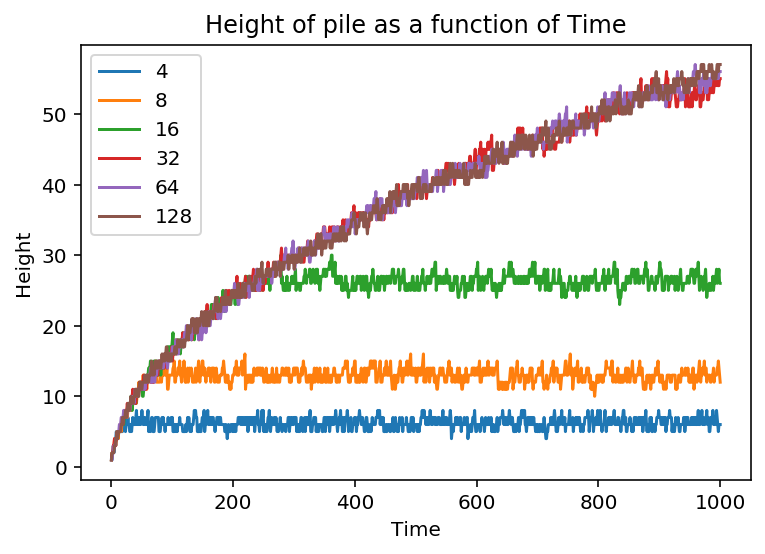

In [108]:
L_list = [4,8,16,32,64,128]
Oslo_height_plot_list(L_list,0.5,1000)

James :0 good luck on the work !!

## 3 The avalanche-size probability P (s; L)
